<a href="https://colab.research.google.com/github/shishiradk/pytorch-pratices/blob/main/03_Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytorch  Computer Vision

## 0. Compuer vision libraries  in Pytorch

* `torchvision` - base domain library for Pytorch computer vision
* `torchvision.datasets`  - get  datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
*  `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for se with an ML model
* `torch.utils.data.Dataset`  - Base dataset class for Pytorch.
* `torch.utils.data.dataloader` - Creates a Python iterable over a dataset

In [20]:
# import Pytorch
import torch
from torch import nn

#import torchvision
import torchvision

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib for visualization
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


##1. getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasetd

In [21]:
#setup  training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", #where to  download the data
    train=True, #do we want the training datasets?
    download = True,# do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(),# how  do we want to transform the data?
    target_transform=None# how do we want to transform the labels/target?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [22]:
len(train_data),len(test_data)

(60000, 10000)

In [23]:
#see the training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [24]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [25]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [26]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### Check the input and output of the data

In [27]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width ]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width ]
Image label: Ankle boot


## 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28]) 


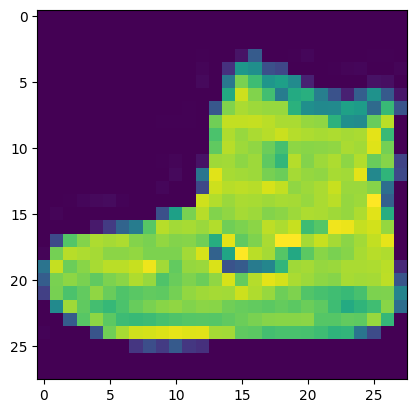

In [31]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape} ")
plt.imshow(image.squeeze())
plt.title(label);
# image